# 6.4 Exercises

In [26]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns

import statsmodels.formula.api as smf
import statsmodels.api as sm
from patsy.contrasts import Treatment

## Exercise 1

For today's exercise we will use the Cleveland Heart Disease dataset. It is a well-known dataset in the field of medical research and machine learning, particularly used for predicting heart disease. The dataset contains data collected from patients with suspected heart disease and includes various clinical and demographic attributes.


1. Please [visit the documentation](https://archive.ics.uci.edu/dataset/45/heart+disease) and familiarize yourself with the dataset.
2. Find the instructions for importing the data in Python. You can remove the printing of the metadata and variables, as this looks horrible in the notebook. Read it in the documentation instead.
3. Create a combined DataFrame, which combines the features and the targets along the first axis: `pd.concat([X, y], axis=1)`.
4. Please check if your data is how you expect it to be. You can use functions like `.describe()` or `.head()`.

In [21]:
# TODO: Download the dataset as described in the documentation
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 

# Create a combined DataFrame
df = pd.concat([X, y], axis=1)

print(df.describe())
print(df.head())

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  299.000000   
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.672241   
std      0.994971   22.8750

## Exercise 2
Plot `age` against the diferent types of chest pain (`cp`) using `sns.boxplot()`. Incorporate the diagnosis of heart disease (`num`) as the `hue`. Add the axis labels and a title.

*Additional information: Remember that patients without heart disease will have num = 0, while those with heart disease will have values ranging from 1 to 4.*

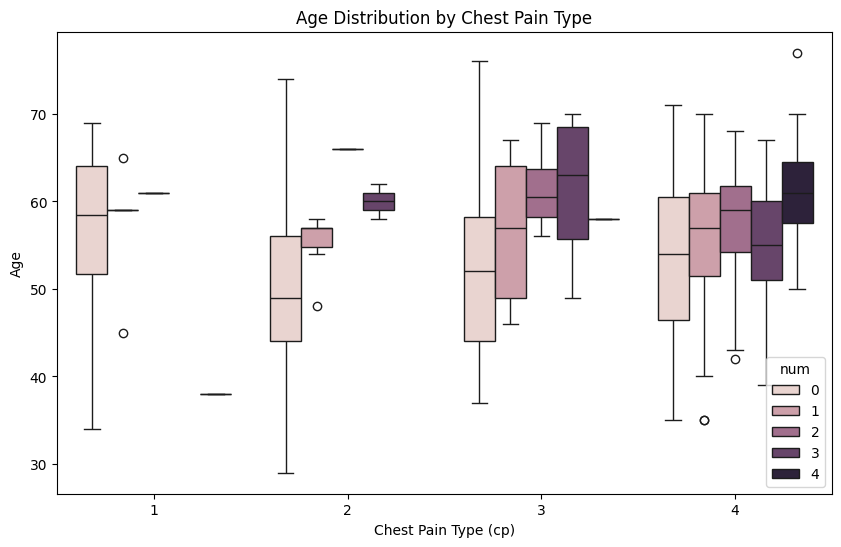

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=?,y=?,hue=?,data=?)


##SOLUTION:
plt.figure(figsize=(10, 6))
sns.boxplot(x='cp', y='age', hue='num', data=df)
plt.title('Age Distribution by Chest Pain Type')
plt.xlabel('Chest Pain Type (cp)')
plt.ylabel('Age')
plt.show()

## Exercise 3
1. Manually create a contrast matrix using dummy coding for the variable `cp`, setting the reference category to 1 (atypical angina). Utilize the `Treatment` from `patsy` for this process.
2. Perform linear regression using `ols()` from `Statsmodels`, with `cp` as the independent variable and `age` as the dependent variable.
3. Discuss the following points:
    - What do the coefficients tell you about the relationship between age and different types of chest pain?
    - Considering the explained variance and significance, do the results suggest an interesting relationship between chest pain type and age? Why or why not?


In [31]:
# Convert 'cp' to categorical variables
df['cp'] = df['cp'].astype('category')
  # Assuming 'num' is your dependent variable

# Get the levels of 'cp'
levels = df['cp'].cat.categories.tolist()
print("Levels:", levels)

# Create a Treatment contrast object
contrast = Treatment(reference=1)  # Set the reference level to '1' (which is atypical angina)

# Create a contrast matrix using the levels of 'cp'
contrast_matrix = contrast.code_without_intercept(levels)

# Print the contrast matrix
print("\nContrast matrix:\n", contrast_matrix.matrix)

model = smf.ols('age ~ C(cp, Treatment(reference=1))', data=df)
results = model.fit()
print(results.summary())

Levels: [1, 2, 3, 4]

Contrast matrix:
 [[0. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     3.364
Date:                Wed, 11 Dec 2024   Prob (F-statistic):             0.0191
Time:                        02:08:06   Log-Likelihood:                -1091.5
No. Observations:                 303   AIC:                             2191.
Df Residuals:                     299   BIC:                             2206.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------

SOLUTION
The only significant difference observed is between typical and atypical angina, with patients displaying significantly younger ages and a higher prevalence of atypical angina. No other categories show significance. However, the model explains only 3.3% of the variance in age. While the significance is low in terms of explanatory power, it is important to note that in clinical contexts, the explained variance is often lower due to the complex mechanisms underlying health issues, which cannot be fully captured by such models.

## Exercise 4
1. Create a weighted effects coding contrast matrix with `age` as the dependent variable and `cp` as the independent variable. Use 1 (typical angina) as the reference category, as in the previous steps.

2. Perform linear regression using `ols()` from `Statsmodels` with the weighted effects coding matrix.

3. Compare and interpret the results against the previous dummy coding approach, specifically focusing on the impact of using a weighted reference category versus an unweighted reference. How does the weighting affect the interpretation of the relationship between cp and age?

In [ ]:
# Calculate sample sizes for each chest pain type
cp_counts = df['cp'].value_counts()
Nt1 = cp_counts.get(1, 0)  # Typical angina
Nt2 = cp_counts.get(2, 0)  # Atypical angina
Nt3 = cp_counts.get(3, 0)  # Non-anginal pain
Nt4 = cp_counts.get(4, 0)  # Asymptomatic

# Define weights for weighted effect coding
atypical_angina_we  = np.array([1, 0, 0])  # Atypical angina
non_anginal_pain_we = np.array([0, 1, 0])  # Non-anginal pain
asymptomatic_we     = np.array([0, 0, 1])  # Asymptomatic

# Check if there's a sample size for the reference category
if Nt1 > 0:
    typical_angina_weights = np.array([-Nt2/Nt1, -Nt3/Nt1, -Nt4/Nt1])  # Weights for typical angina
else:
    raise ValueError("Sample size for reference category 'Typical angina' cannot be zero.")

# Create the contrast matrix dictionary with Typical angina as reference
contrast_matrix = {
    1: typical_angina_weights, # Typical angina (reference category with weights)
    2: atypical_angina_we,     # Atypical angina
    3: non_anginal_pain_we,    # Non-anginal pain
    4: asymptomatic_we         # Asymptomatic
}

# Print the contrast matrix
print("Contrast Matrix:")
for k, v in contrast_matrix.items():
    print(f"{k}: {v}")

# Create the design matrix and outcome vector
X = np.array([contrast_matrix[cp] for cp in df['cp']])
X = sm.add_constant(X)
y = df['age']

# Fit the model
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())


Contrast Matrix:
1: [-2.17391304 -3.73913043 -6.26086957]
2: [1 0 0]
3: [0 1 0]
4: [0 0 1]
                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     3.364
Date:                Wed, 11 Dec 2024   Prob (F-statistic):             0.0191
Time:                        02:05:40   Log-Likelihood:                -1091.5
No. Observations:                 303   AIC:                             2191.
Df Residuals:                     299   BIC:                             2206.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

SOLUTION:
Dummy Coding provides simple, clear comparisons against a single fixed group (like Asymptomatic), but the interpretation can be sensitive to imbalances in the reference group.
Weighted Effect Coding offers a more balanced comparison, as it adjusts the reference category to account for differences in group sizes. This results in coefficients that are more representative of the overall structure of the data.
Atypical Angina and Asymptomatic have clearer interpretations in the weighted model.
The weighted model also gives a more accurate sense of how each group (such as Atypical Angina and Asymptomatic) relates to the other chest pain categories, as it doesn’t rely on any one group being a fixed reference.